# 다음의 두 데이터에 대한 회귀 분석을 하여라.
1. Boston House Price
2. Diabetes

# Boston House Price

In [549]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
import numpy as np
import os

In [550]:
os.chdir('C:\\Users\Astrocyte\Desktop\\2020년2학기(8학기)정리\전산물리학2\Comphy2\\as3')

In [551]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [552]:
X=boston.data
y=boston.target
names=boston.feature_names

In [553]:
reg=LinearRegression()
lasso_reg=Lasso(alpha=1)
ridge_reg=Ridge(alpha=1)

reg.fit(X,y)
lasso_reg.fit(X,y)
ridge_reg.fit(X,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [554]:
print("Coefficient"+'\n')
print('\t MES \t\t Ridge \t\t  Lasso','\n')
for a, b, c, d in zip(boston.feature_names, reg.coef_,ridge_reg.coef_,lasso_reg.coef_):
    print("%s: \t %f \t %f \t %f" %(a,b,c,d))

Coefficient

	 MES 		 Ridge 		  Lasso 

CRIM: 	 -0.108011 	 -0.104595 	 -0.063437
ZN: 	 0.046420 	 0.047443 	 0.049165
INDUS: 	 0.020559 	 -0.008805 	 -0.000000
CHAS: 	 2.686734 	 2.552393 	 0.000000
NOX: 	 -17.766611 	 -10.777015 	 -0.000000
RM: 	 3.809865 	 3.854000 	 0.949811
AGE: 	 0.000692 	 -0.005415 	 0.020910
DIS: 	 -1.475567 	 -1.372654 	 -0.668790
RAD: 	 0.306049 	 0.290142 	 0.264206
TAX: 	 -0.012335 	 -0.012912 	 -0.015212
PTRATIO: 	 -0.952747 	 -0.876074 	 -0.722966
B: 	 0.009312 	 0.009673 	 0.008247
LSTAT: 	 -0.524758 	 -0.533343 	 -0.761115


## Regression 결과 해석

MES는 어떠한 penalty도 없이 최소제곱법을 통해 선형회귀를 한 것이다.

Ridge는 $\lambda \sum_{i}^{n}{\omega_i^{2}}$ 만큼의 penalty를 적용한 후에 최소제곱법을 통해 선형회귀를 한 것이다.

Lasso는 $\lambda \sum_{i}^{n}{|\omega_i|}$ 만큼의 penalty를 적용한 후에 최소제곱법을 통해 선형회귀를 한 것이다.

만약에 데이터에 Variance가 없는 경우에는 MES가 가장 좋은 결과를 낸다. 하지만 Boston House price의 경우 13개의 features(variables)가 있고, 이런 경우 Variance가 크게 생기기에, Regularization을 통해 Variance를 낮추는 편이 정확도가 더 높다고 한다. 그리고 Ridge Regression은 penalty에 적용하는 $\lambda$가 크더라도 큰 문제가 Coefficient를 "0"까지 낮추지는 않는다. 그와 반대로 Lasso Regression은 $\lambda$가 큰 경우에 Coefficient가 "0"이 될 수 있다. 따라서 Ridge는 모든 features들이 적합하였을 때 성능이 좋고, Lasso는 많은 features들 중에 관련이 없는 features를 뽑아내는 데에 좋다.

 $\lambda$는 임의로 "1"을 대입했다. 값이 커질수록 penalty가 증가하여, 더 엄격한 기준을 적용하게 된다. 이때의 Coefficient의 크기는 해당 features가 House price에 얼마나 큰 영향을 미치지를 말하며, 부호는 "+"는 House price를 늘리는 영향을, "-"는 House price를 낮추는 영향 준다는 것을 말한다. 이때 INDUS, CHAS, NOX는 Lasso Regression에서는 아무런 영향이 없는 feature라고 말해준다. 
 
 여기서 INDUS는 다른 회귀모델에서도 낮게 나오기에, target에 큰 영향을 주지 않은 feature라고 생각된다. 그에 반해 CHAS와 NOX는 다른 모델에서 영향을 크게 미친다고 나오기에, 중요한 feature인 것 같다. (CHAS는 Binary형태의 데이터이기에 선형회귀에 적합하지 않은 것 같다.) 그 밖에도 AGE, B 같은 feature도 전체 모델에서 수치가 작고, AGE의 경우는 부호마저 달라지기에 target과 별로 관련 없는 것 같다.
 따라서 INDUS, AGE, B를 제외한 변수들은 House price에 영향을 준다는 것을 알 수 있었다.


In [555]:
print("Regression Intercept")
print('MES_intercept: ',reg.intercept_)
print('Ridge_intercept: ',ridge_reg.intercept_)
print('Lasso_intercept: ',lasso_reg.intercept_)

Regression Intercept
MES_intercept:  36.459488385089855
Ridge_intercept:  31.597669818274117
Lasso_intercept:  41.05693374499337


Lasso의 경우 전체적인 Coefficient 값들이 매우 작은데, 이는 intercept가 높다는 점과 함께 특정 변수에 영향을 적게 본다는 것을 보여준다.

In [556]:
def lin_eq(intercept,coef,names,oper='*'):
    eq=['y = '+ str(intercept)]
    for idx in range(len(names)):
        if coef[idx]> 0:
            eq.append('+'+str(coef[idx]))
            eq.append(oper)
            eq.append(names[idx])
        elif coef[idx]<0:
            eq.append(str(coef[idx]))
            eq.append(oper)
            eq.append(names[idx])
    return ''.join(eq)

print('\nRegression Result')
print('\nMES: ',lin_eq(reg.intercept_,reg.coef_,names))
print('\nRidge: ',lin_eq(ridge_reg.intercept_,ridge_reg.coef_,names))
print('\nLasso: ',lin_eq(lasso_reg.intercept_,lasso_reg.coef_,names))


Regression Result

MES:  y = 36.459488385089855-0.10801135783679539*CRIM+0.04642045836687953*ZN+0.020558626367068917*INDUS+2.6867338193448442*CHAS-17.766611228299986*NOX+3.8098652068092282*RM+0.0006922246403431768*AGE-1.47556684560025*DIS+0.30604947898516427*RAD-0.012334593916574021*TAX-0.9527472317072921*PTRATIO+0.00931168327379375*B-0.5247583778554881*LSTAT

Ridge:  y = 31.597669818274117-0.10459527842441473*CRIM+0.04744322433513673*ZN-0.008804678886329567*INDUS+2.5523932187040237*CHAS-10.777014648164577*NOX+3.854000198298672*RM-0.005414538098999304*AGE-1.37265352504551*DIS+0.2901415888480396*RAD-0.012911646303983587*TAX-0.8760743938291666*PTRATIO+0.009673279451802677*B-0.5333432253389825*LSTAT

Lasso:  y = 41.05693374499337-0.06343729004514066*CRIM+0.04916466550764739*ZN+0.9498106999845143*RM+0.020909514944737546*AGE-0.6687900023707882*DIS+0.26420643097453383*RAD-0.01521158979163473*TAX-0.7229663585199505*PTRATIO+0.00824703348549421*B-0.7611145367697878*LSTAT


In [557]:
print('Regression Score')
print('MES_Score: ',reg.score(X,y))
print('Ridge_Score: ',ridge_reg.score(X,y))
print('Lasso_Score: ',lasso_reg.score(X,y))

Regression Score
MES_Score:  0.7406426641094094
Ridge_Score:  0.7388703133867616
Lasso_Score:  0.6825842212709925


MES > Ridge > Lasso 순으로 스코어가 높은 것을 보았을 때, 설정된 feature들이 상당히 의미가 있고, 그들의 Variance가 그렇게 크지 않음을 알 수 있다.

## Regression Result

$$ MES:  y \approx36.46-0.1080\cdot CRIM+0.04642\cdot ZN+0.02056\cdot INDUS+2.687\cdot CHAS-17.77\cdot NOX+3.810\cdot RM+0.0006922\cdot AGE-1.476\cdot DIS+0.3060\cdot RAD-0.01233\cdot TAX-0.953\cdot PTRATIO+0.009312\cdot B-0.5248\cdot LSTAT , \quad with \; Score\approx0.741$$ 

$$Ridge:  y \approx 31.60-0.1046\cdot CRIM+0.04744\cdot ZN-0.008805\cdot INDUS+2.552\cdot CHAS-10.78\cdot NOX+3.854\cdot RM-0.005415\cdot AGE-1.373\cdot DIS+0.2901\cdot RAD-0.01291\cdot TAX-0.8761\cdot PTRATIO+0.009673\cdot B-0.5333\cdot LSTAT, \quad at\, \lambda=1 \quad with \; Score\approx0.739$$

$$Lasso:  y = 41.06-0.06344\cdot CRIM+0.04916\cdot ZN+0.9498\cdot RM+0.02092\cdot AGE-0.6688\cdot DIS+0.2642\cdot RAD-0.01521\cdot TAX-0.7230\cdot PTRATIO+0.008247\cdot B-0.7611\cdot LSTAT, \quad at\, \lambda=1 \quad with \; Score\approx0.683$$

In [558]:
scores=[]
lasso_scores=[]
ridge_scores=[]

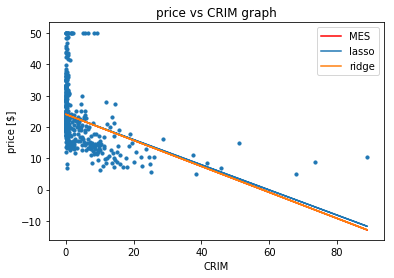

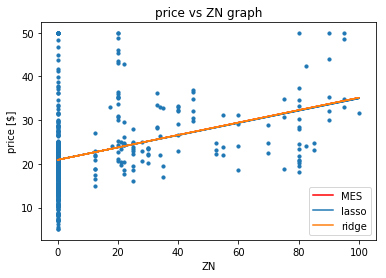

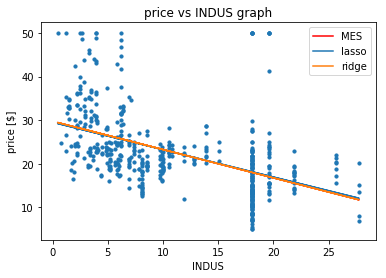

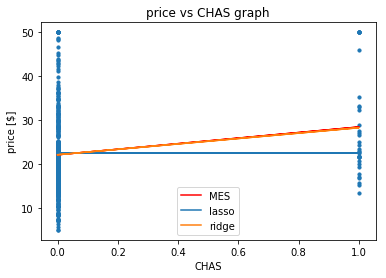

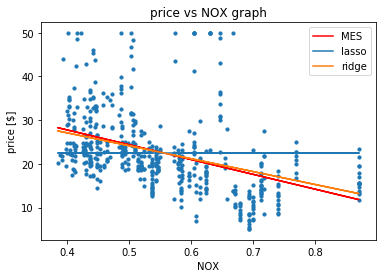

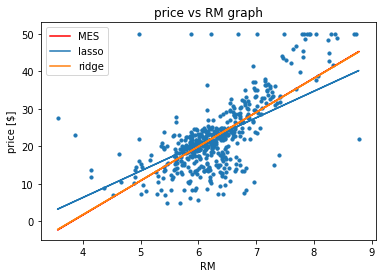

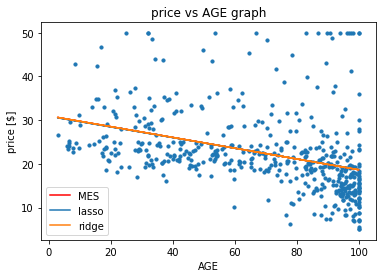

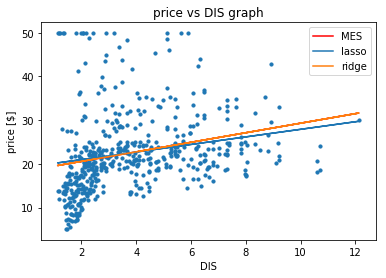

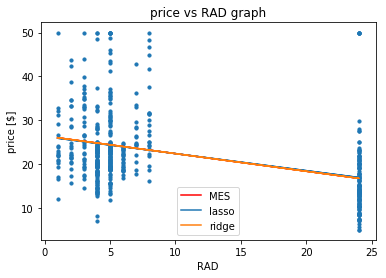

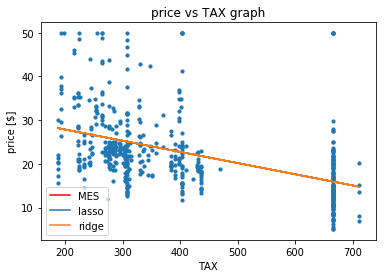

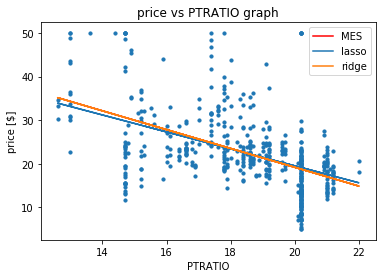

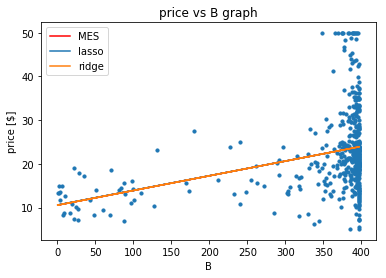

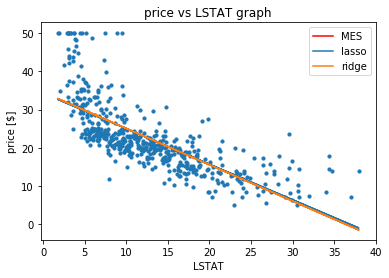

In [559]:
for idx in range(len(names)):
    x=[[i] for i in X[:,idx]]
    
    reg.fit(x,y)
    lasso_reg.fit(x,y)
    ridge_reg.fit(x,y)
    
    scores.append(reg.score(x,y))
    lasso_scores.append(lasso_reg.score(x,y))
    ridge_scores.append(ridge_reg.score(x,y))
    
    plt.figure(names[idx])
    plt.title('price vs '+names[idx]+' graph')
    plt.xlabel(names[idx]) ; plt.ylabel('price [$]')
    plt.plot(x,reg.predict(x),label='MES',color='red')
    plt.plot(x,lasso_reg.predict(x),label='lasso')
    plt.plot(x,ridge_reg.predict(x),label='ridge')
    plt.scatter(x,y,s=10)
    plt.legend()
    #plt.savefig('Boston House Price Dataset Figure\\'+'price vs '+names[idx]+' graph.png')
    #plt.show()

In [560]:
print("Each features' linear regression scores"+'\n')
print('\t MES \t\t Ridge \t\t  Lasso','\n')
for a, b, c, d in zip(names, scores,ridge_scores,lasso_scores):
    print("%s: \t %f \t %f \t %f" %(a,b,c,d))

Each features' linear regression scores

	 MES 		 Ridge 		  Lasso 

CRIM: 	 0.150780 	 0.150780 	 0.150620
ZN: 	 0.129921 	 0.129921 	 0.129899
INDUS: 	 0.233990 	 0.233990 	 0.233738
CHAS: 	 0.030716 	 0.030689 	 0.000000
NOX: 	 0.182603 	 0.179587 	 0.000000
RM: 	 0.483525 	 0.483518 	 0.459483
AGE: 	 0.142095 	 0.142095 	 0.142080
DIS: 	 0.062464 	 0.062464 	 0.059788
RAD: 	 0.145639 	 0.145639 	 0.145482
TAX: 	 0.219526 	 0.219526 	 0.219526
PTRATIO: 	 0.257847 	 0.257847 	 0.255315
B: 	 0.111196 	 0.111196 	 0.111195
LSTAT: 	 0.544146 	 0.544146 	 0.543914


linear regression을 했지만, 실제로 feature들이 target과 선형관계인지는 알지 못한다. linear regression은 적어도 증감하는 경향과 정도를 알려줄 뿐이다. 따라서 그래프를 그려서 각 feature들이 target과 어떤 관계에 있는지 살펴보았고, 선형회귀 또한 각각에 대해서 진행해 보았다.그래프만 보면 RM와 PTRATIO이 그나마 선형성을 띄는 것 같고, score 또한 해당 feature에 대해서 높은 값을 주었다. 그래도 전반적인 스코어가 매우 낮기에, 각각의 feature들이 target에 독립적인 영향을 미치는 것 같지는 않다. 즉, 여러 feature들이 서로 연관관계가 있는 것 같다.

In [561]:
X_fil=np.delete(X,[2,3,4],axis=True)
names_fil=np.delete(names,[2,3,4])

print(X_fil.shape)
print(names_fil)

(506, 10)
['CRIM' 'ZN' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']


In [562]:
reg.fit(X_fil,y)
lasso_reg.fit(X_fil,y)
ridge_reg.fit(X_fil,y)

print('Regression Score')
print('MES_Score: ',reg.score(X_fil,y))
print('Ridge_Score: ',ridge_reg.score(X_fil,y))
print('Lasso_Score: ',lasso_reg.score(X_fil,y))

Regression Score
MES_Score:  0.7244257946684737
Ridge_Score:  0.7244230460843468
Lasso_Score:  0.6825842119370464


Lasso Regression이 연관이 없는 feature를 알아내는데 좋고, Ridge Regression은 연관된 feature만 있을 때 성능이 좋기에, Lasso Regression에서 "0"이 된 feature를 제거한 후에 Ridge Regression을 다시해보았다.그러나 이전 Ridge_Score가 0.7389 였는데 반해, 제거 후에는 오히려 0.7244로 성능이 오히려 하락했다. 위에서 언급한 관련이 없다고 평가한 feature INDUS, AGE,B를 제거한 경우에도 0.7324로 성능이 오히려 더 하락했다. 따라서 Lasso와 Ridge에 대한 위의 언급이 무조건 맞는 것 같지는 않다. 

In [563]:
from sklearn.linear_model import ElasticNet

In [564]:
elastic_reg=ElasticNet(alpha=1)
reg.fit(X,y)
lasso_reg.fit(X,y)
ridge_reg.fit(X,y)
elastic_reg.fit(X,y)
print("Coefficient"+'\n')
print('\t MES \t\t Ridge \t\t  Lasso \t ElasticNet','\n')
for a, b, c, d,e in zip(boston.feature_names, reg.coef_,ridge_reg.coef_,lasso_reg.coef_,elastic_reg.coef_):
    print("%s: \t %f \t %f \t %f \t %f" %(a,b,c,d,e))
print("\nElastic_intercept:",elastic_reg.intercept_)
print("\nElastic_Score:",elastic_reg.score(X,y))
print('\nElastic Net: ',lin_eq(elastic_reg.intercept_,elastic_reg.coef_,names))

Coefficient

	 MES 		 Ridge 		  Lasso 	 ElasticNet 

CRIM: 	 -0.108011 	 -0.104595 	 -0.063437 	 -0.080371
ZN: 	 0.046420 	 0.047443 	 0.049165 	 0.053240
INDUS: 	 0.020559 	 -0.008805 	 -0.000000 	 -0.012657
CHAS: 	 2.686734 	 2.552393 	 0.000000 	 0.000000
NOX: 	 -17.766611 	 -10.777015 	 -0.000000 	 -0.000000
RM: 	 3.809865 	 3.854000 	 0.949811 	 0.933936
AGE: 	 0.000692 	 -0.005415 	 0.020910 	 0.020579
DIS: 	 -1.475567 	 -1.372654 	 -0.668790 	 -0.762044
RAD: 	 0.306049 	 0.290142 	 0.264206 	 0.301569
TAX: 	 -0.012335 	 -0.012912 	 -0.015212 	 -0.016439
PTRATIO: 	 -0.952747 	 -0.876074 	 -0.722966 	 -0.748046
B: 	 0.009312 	 0.009673 	 0.008247 	 0.008339
LSTAT: 	 -0.524758 	 -0.533343 	 -0.761115 	 -0.758426

Elastic_intercept: 42.22956397215435

Elastic_Score: 0.6861018474345026

Elastic Net:  y = 42.22956397215435-0.08037077185812899*CRIM+0.053239513127193196*ZN-0.012657095648025456*INDUS+0.9339355492027829*RM+0.02057919955818787*AGE-0.7620439078155641*DIS+0.30156906104872366

그 밖에도 Elastics Net Regression이라는 Lasso와 Ridge의 패널티를 모두 적용하는 Regression도 많이 쓴다고 하여서 적용해보았다.
Elastics Net은 서로 연관관계가 높은 feature들은 같은 coefficient가 나오게 한다고 한다. 결과를 보았을 때, 그러한 특징은 잘 모르겠다. 적어도 Elastic Net이 Ridge보다는 엄격하고, Lasso보다는 덜 엄격한 기준을 가지고 있는 것 처럼 나왔다. 왜냐하면 Lasso는 INDUS에 "0"을 준 반면에, Elastic Net은 "0"을 주지 않았기 때문이다. 또한, 스코어를 보면 MES >Ridge> Elastics Net> Lasso가 좋다고 나오기에 Lasso와 Elastic Net은 더 많은 feature를 다룰 때 적합한 것 같다.

In [565]:
N=1000
tscore={'MES':[],'Lasso':[], 'Ridge':[],'Elastic Net':[]}
for i in range(N):
    sel_train=np.random.choice(X.shape[0],int(X.shape[0]/2))

    #train data 
    X_tr=X[sel_train]
    y_tr=y[sel_train]

    #test data
    X_te=np.delete(X,sel_train,0)
    y_te=np.delete(y,sel_train,0)

    #linear regression
    reg.fit(X_tr,y_tr)
    lasso_reg.fit(X_tr,y_tr)
    ridge_reg.fit(X_tr,y_tr)
    elastic_reg.fit(X_tr,y_tr)
    
    tscore['MES'].append(reg.score(X_te,y_te))
    tscore['Ridge'].append(ridge_reg.score(X_te,y_te))
    tscore['Lasso'].append(lasso_reg.score(X_te,y_te))
    tscore['Elastic Net'].append(elastic_reg.score(X_te,y_te))
    
#model's scores
print('MES training Score: ',reg.score(X_tr,y_tr))
print('Ridge training Score: ',ridge_reg.score(X_tr,y_tr))
print('Lasso training Score: ',lasso_reg.score(X_tr,y_tr))
print('Elastic Net training Score: ',elastic_reg.score(X_tr,y_tr))


print('\nMES test Score: ',reg.score(X_te,y_te))
print('Ridge test Score: ',ridge_reg.score(X_te,y_te))
print('Lasso test Score: ',lasso_reg.score(X_te,y_te))
print('Elastic Net test Score: ',elastic_reg.score(X_te,y_te))

print('\nmean of MES test Score: ',np.average(tscore["MES"]))
print('mean of Ridge test Score: ',np.average(tscore["Ridge"]))
print('mean of Lasso test Score: ',np.average(tscore["Lasso"]))
print('mean of Elastic Net test Score: ',np.average(tscore["Elastic Net"]))

MES training Score:  0.7608327709226304
Ridge training Score:  0.7570253204586997
Lasso training Score:  0.71433421727109
Elastic Net training Score:  0.7104418900160421

MES test Score:  0.7241762209888849
Ridge test Score:  0.719098108996032
Lasso test Score:  0.6715765761004872
Elastic Net test Score:  0.6662805746626346

mean of MES test Score:  0.6949144575550109
mean of Ridge test Score:  0.6920967505574153
mean of Lasso test Score:  0.6447916062914758
mean of Elastic Net test Score:  0.6526158975499485


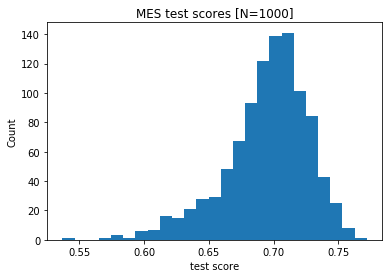

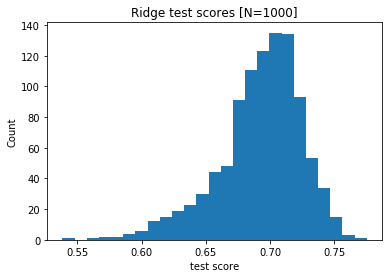

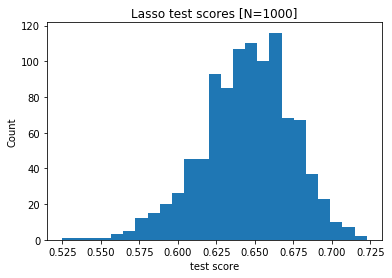

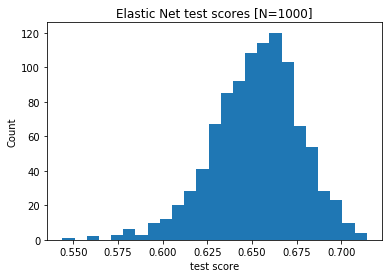

In [566]:
for title in ['MES','Ridge','Lasso','Elastic Net']:
    plt.figure(title)
    plt.title(title+' test scores [N='+str(N)+']')
    plt.hist(tscore[title],bins=25)
    plt.xlabel('test score'); plt.ylabel('Count')
    #plt.savefig('Boston House Price Dataset Figure\\'+title+' test scores.png')
    #plt.show()

Regularization 자체가 정확도를 포기하는 대신에 예측 성능을 늘렸다는 점을 고려하여서, 데이터 절반을 임의로 선택하여 linear regression에 사용하고, 나머지 절반은 해당 regression이 얼마나 정확지 확인하는데 사용했다. 그럴경우 Regularization을 한 것이 더 좋을 것 같다는 예상과 달리 test Score의 순위는 임의적이었다. 따라서 1000번 regression한 test score를 histogram으로 그리고 평균도 내보았다. 그랬을 때, MES> Ridge> Elastic Net> Lasso 순으로 test 성능이 좋았다. 따라서 해당 데이터를 가장 잘 예측하는 선형회귀 모델은 MES인 것 같다. 이로부터 주어진 데이터가 상당히 unbiased 되어있다는 것도 알 수 있다.

# Diabetes (당뇨)

In [567]:
from sklearn.datasets import load_diabetes

In [568]:
dia = load_diabetes()
print(dia.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [569]:
X_d=dia.data
y_d=dia.target
names=dia.feature_names

In [570]:
reg.fit(X_d,y_d)
lasso_reg.fit(X_d,y_d)
ridge_reg.fit(X_d,y_d)
elastic_reg.fit(X_d,y_d)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [571]:
print("Coefficient"+'\n')
print('\t MES \t\t Ridge \t\t  Lasso \t ElasticNet','\n')
for a, b, c, d,e in zip(names, reg.coef_,ridge_reg.coef_,lasso_reg.coef_,elastic_reg.coef_):
    print("%s: \t %f \t %f \t %f \t %f" %(a,b,c,d,e))

print("\nRegression Intercept")
print('MES_intercept: ',reg.intercept_)
print('Ridge_intercept: ',ridge_reg.intercept_)
print('Lasso_intercept: ',lasso_reg.intercept_)
print('Elastic_intercept:', elastic_reg.intercept_)

print('\nRegression Score')
print('MES_Score: ',reg.score(X_d,y_d))
print('Ridge_Score: ',ridge_reg.score(X_d,y_d))
print('Lasso_Score: ',lasso_reg.score(X_d,y_d))
print("Elastic_Score:",elastic_reg.score(X_d,y_d))


print('\nRegression Result')
print('\nMES: ',lin_eq(reg.intercept_,reg.coef_,names))
print('\nRidge: ',lin_eq(ridge_reg.intercept_,ridge_reg.coef_,names))
print('\nLasso: ',lin_eq(lasso_reg.intercept_,lasso_reg.coef_,names))
print('\nElastic Net: ',lin_eq(elastic_reg.intercept_,elastic_reg.coef_,names))

Coefficient

	 MES 		 Ridge 		  Lasso 	 ElasticNet 

age: 	 -10.012198 	 29.465746 	 0.000000 	 0.359018
sex: 	 -239.819089 	 -83.154885 	 -0.000000 	 0.000000
bmi: 	 519.839787 	 306.351627 	 367.701852 	 3.259767
bp: 	 324.390428 	 201.629434 	 6.301904 	 2.204356
s1: 	 -792.184162 	 5.909369 	 0.000000 	 0.528646
s2: 	 476.745838 	 -29.515927 	 0.000000 	 0.250935
s3: 	 101.044570 	 -152.040465 	 -0.000000 	 -1.861363
s4: 	 177.064176 	 117.311715 	 0.000000 	 2.114454
s5: 	 751.279321 	 262.944995 	 307.605700 	 3.105841
s6: 	 67.625386 	 111.878718 	 0.000000 	 1.769851

Regression Intercept
MES_intercept:  152.1334841628965
Ridge_intercept:  152.13348416289622
Lasso_intercept:  152.13348416289637
Elastic_intercept: 152.13348416289594

Regression Score
MES_Score:  0.5177494254132934
Ridge_Score:  0.4512313946799056
Lasso_Score:  0.35737932948734685
Elastic_Score: 0.008834770038328776

Regression Result

MES:  y = 152.1334841628965-10.012197817470962*age-239.81908936565566*sex+519.

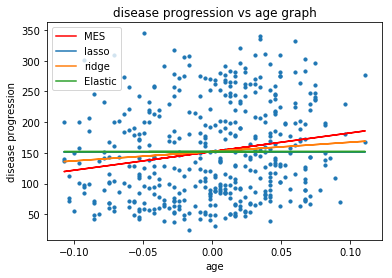

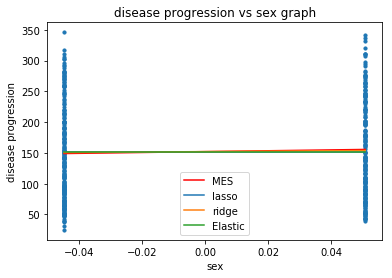

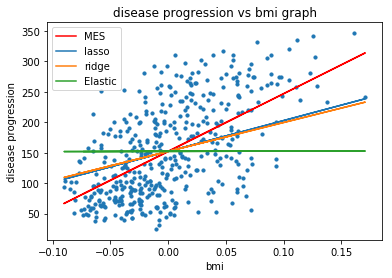

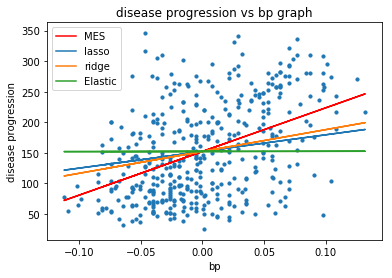

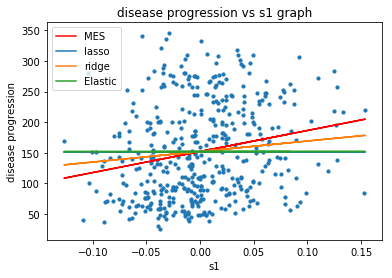

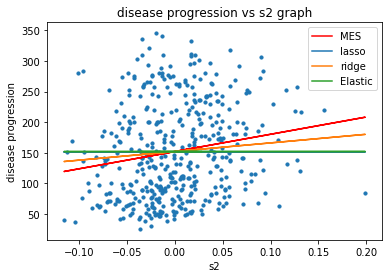

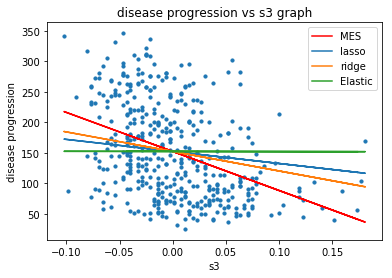

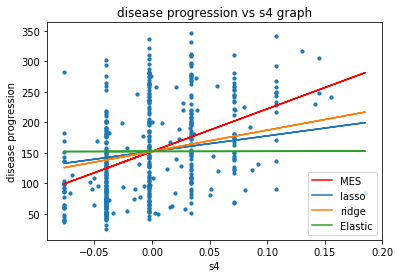

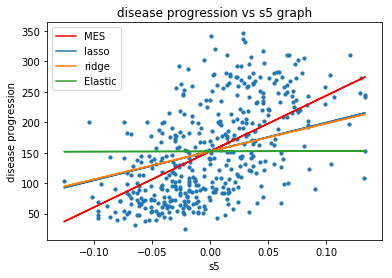

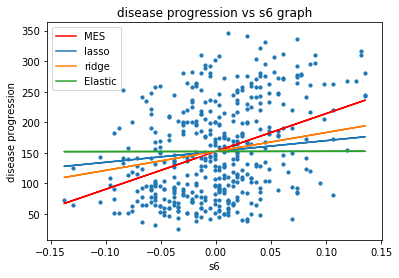

In [572]:
scores=[]
lasso_scores=[]
ridge_scores=[]
elastic_scores=[]


for idx in range(len(names)):
    x=[[i] for i in X_d[:,idx]]
    reg.fit(x,y_d)
    lasso_reg.fit(x,y_d)
    ridge_reg.fit(x,y_d)
    elastic_reg.fit(x,y_d)
    
    scores.append(reg.score(x,y_d))
    lasso_scores.append(lasso_reg.score(x,y_d))
    ridge_scores.append(ridge_reg.score(x,y_d))
    elastic_scores.append(elastic_reg.score(x,y_d))
    
    plt.figure(names[idx])
    plt.title('disease progression vs '+names[idx]+' graph')
    plt.xlabel(names[idx]) ; plt.ylabel('disease progression')
    plt.plot(x,reg.predict(x),label='MES',color='red')
    plt.plot(x,lasso_reg.predict(x),label='lasso')
    plt.plot(x,ridge_reg.predict(x),label='ridge')
    plt.plot(x,elastic_reg.predict(x),label='Elastic')
    plt.scatter(x,y_d,s=10)
    plt.legend()
    #plt.savefig('Diabete Dataset Figure\\'+'disease progeression vs '+names[idx]+' graph.png')
    #plt.show()

In [573]:
print("Each fetures' linear Regression Scores"+'\n')
print('\t MES \t\t Ridge \t\t  Lasso \t Elastic Net','\n')
for a, b, c, d,e in zip(names, scores,ridge_scores,lasso_scores,elastic_scores):
    print("%s: \t %f \t %f \t %f \t %f" %(a,b,c,d,e))

Each fetures' linear Regression Scores

	 MES 		 Ridge 		  Lasso 	 Elastic Net 

age: 	 0.035302 	 0.026477 	 0.000000 	 0.000087
sex: 	 0.001854 	 0.001391 	 0.000000 	 0.000000
bmi: 	 0.343924 	 0.257943 	 0.269386 	 0.002373
bp: 	 0.194908 	 0.146181 	 0.120370 	 0.001211
s1: 	 0.044954 	 0.033715 	 0.000000 	 0.000144
s2: 	 0.030295 	 0.022721 	 0.000000 	 0.000059
s3: 	 0.155859 	 0.116894 	 0.081321 	 0.000917
s4: 	 0.185290 	 0.138967 	 0.110752 	 0.001138
s5: 	 0.320224 	 0.240168 	 0.245686 	 0.002185
s6: 	 0.146294 	 0.109720 	 0.071756 	 0.000846


## Regression 결과 해석

위와 동일하게 Regularization이 포함된 Regression은 임의로 $\lambda=1$로 잡고 회귀 분석을 하였다.

age의 경우 MES는 당뇨의 진행에 긍정적인 영향을 미친다고 말해주지만, Ridge, Elastic Net은 악영향을 미친다고 말해주며, Lasso는 영향이 없다고 말해준다. age가 나이라는 점을 고려했을 때, 당뇨의 진행에 긍정적인 영향을 미친다는 것은 사실상 잘못된 fitting인 것 같다. 그러나 각각의  feature들에 대해 선형회귀를 한 결과를 보면, MES도 age가 당뇨에 악영향을 준다고 나온다. 즉, 전체 변수에 대한 regression에서는 다른 변수와의 상호작용에서 인지, coefficient가 "-"가 나온 것 같다.

sex는 Binary 형식의 데이터로 남성 아니면 여성이다. 그러나 -0.05가 남성인지, 0.05가 남성인지는 알 수 없었다. MES와 Ridge에서는 당뇨병이 0.05로 표기된 성에 악영향을 준다고 말하고, Lasso와 Elastics Net은 관련이 없다고 말한다.그래프를 보았을 때는 큰 차이는 없는 것 같다.

bmi는 모든 regression 방식에서 모두 당뇨병 진행에 악영향을 준다고 한다. 당뇨병에는 제 1형 당뇨병과 제 2형 당뇨병이 있는데, 이는 인슐린 분비 유무의 차이이다. bmi는 비만과 관련되어 있기에 영양에 과도하게 노출되어서 인슐린 저항성이 생겼다고 판단된다. 따라서 bmi가 당뇨병에 악영향을 준다는 분석 결과는 맞는 것 같다. 그래프를 보았을 때도 제일 선형 모델에 잘 맞아 보이고, 개별적인 선형회귀에서도 스코어가 제일 높았다.

bp는 혈압으로 이 또한 모든 regression 방식에서 당뇨병 진행에 악영향을 준다고 나왔다. 이또한 bmi와 유사한 이유로 실제와 잘 맞는 것 같다.

s1~ 6은 혈청(blood serum)의 6종류의 요소를 말한다.MES는 s1은 당뇨병에 긍적적인 영향을 주고, s2~6는 악영향을 준다고 나온다.그러나 개별적인 요소에 대한 선형회귀 결과와 부호가 다른 걸보면, 이 또한 다른 feature와의 상호작용이 있을 수도 있는 것 같다. Ridge regression은 s2,s3은 당뇨병에 긍정적인 영향, s1,s4,s5,s6은 당뇨병에 악영향을 준다고 말한다. 이또한 개별적인 선형회귀에서와 반대의 결과를 보여주는 feature가 있다. 따라서 feature들과 상호작용이 있는 것 같다. Lasso의 경우 5s는 악영향을 주지만, 나머지는 혈청 요소와 관련이 없다고 말해준다. Elastic Net model은 s3만이 당뇨병에 긍정적 영향을 주고, 나머지 feature는 당뇨병에 악영향을 준다고 말해준다. 그러나 그 수치가 다른 모델에 비해 매우 작은 것을 확인할 수 있다. 위 네 가지 Regression을 미루어 보았을 때, 혈청 요소 s5은 확실히 당뇨병에 악영향을 미치는 것 같다.

절편은 약 "152.133" 으로 네 가지 regression에서 모두 유사하게 나왔다.

데이터에 대한 선형 회귀의 정확성은 MES > Ridge > Lasso > Elastic Net 순으로 나왔다.그러한 점을 미루어 보았을 때, feature들 간의 상관 관계가 높은 편이 아닌가 한다. 한편 위의 Boston House Price에서도 MES가 제일 높은 정확도를 가졌는데, 이는 데이터에 대한 정확도를 포기하고 예측의 정확도를 높이려는 Regularization의 특징 때문인 것 같다.



## Regression Result

$$ MES:  y \approx 152.13-10.012\cdot age-239.82\cdot sex+519.84\cdot bmi+324.39\cdot bp-792.18\cdot s1+476.75\cdot s2+101.04\cdot s3+177.06\cdot s4+751.28\cdot s5+67.625\cdot s6, \quad with \; Score\approx0.518$$

$$ Ridge:  y \approx 152.13348416289622+29.46574564422942\cdot age-83.15488546325\cdot sex+306.35162705637214\cdot bmi+201.62943383870217\cdot bp+5.9093689618682435\cdot s1-29.515926646857398\cdot s2-152.0404653931835\cdot s3+117.31171538202878\cdot s4+262.9449953268541\cdot s5+111.87871800112721\cdot s6, \quad at\, \lambda=1 \quad with \; Score\approx0.451$$

$$Lasso: y \approx 152.13348416289637+367.7018520698164\cdot bmi+6.301904186054684\cdot bp+307.6057000044813\cdot s5 , \quad at\, \lambda=1 \quad with \; Score\approx0.357 $$

$$ Elastic\,Net:  y \approx 152.13348416289594+0.35901787011739134\cdot age+3.2597672440758405\cdot bmi+2.204355574953443\cdot bp+0.5286455600027293\cdot s1+0.25093508318279734\cdot s2-1.861363202330391\cdot s3+2.1144540266540086\cdot s4+3.105840727076851\cdot s5+1.7698509616010372\cdot s6, \quad at\, \lambda=1 \quad with \; Score\approx0.00883  $$

In [574]:
N=1000
tscore={'MES':[],'Lasso':[], 'Ridge':[],'Elastic Net':[]}

for i in range(N):
    sel_train=np.random.choice(X_d.shape[0],int(X_d.shape[0]/2))

    #train data 
    X_dtr=X_d[sel_train]
    y_dtr=y_d[sel_train]

    #test data
    X_dte=np.delete(X_d,sel_train,0)
    y_dte=np.delete(y_d,sel_train,0)

    #linear regression
    reg.fit(X_dtr,y_dtr)
    lasso_reg.fit(X_dtr,y_dtr)
    ridge_reg.fit(X_dtr,y_dtr)
    elastic_reg.fit(X_dtr,y_dtr)
    
    tscore['MES'].append(reg.score(X_dte,y_dte))
    tscore['Ridge'].append(ridge_reg.score(X_dte,y_dte))
    tscore['Lasso'].append(lasso_reg.score(X_dte,y_dte))
    tscore['Elastic Net'].append(elastic_reg.score(X_dte,y_dte))
    
#model's scores
print('MES training Score: ',reg.score(X_dtr,y_dtr))
print('Ridge training Score: ',ridge_reg.score(X_dtr,y_dtr))
print('Lasso training Score: ',lasso_reg.score(X_dtr,y_dtr))
print('Elastic Net training Score: ',elastic_reg.score(X_dtr,y_dtr))


print('\nMES test Score: ',reg.score(X_dte,y_dte))
print('Ridge test Score: ',ridge_reg.score(X_dte,y_dte))
print('Lasso test Score: ',lasso_reg.score(X_dte,y_dte))
print('Elastic Net test Score: ',elastic_reg.score(X_dte,y_dte))

print('\nmean of MES test Score: ',np.average(tscore["MES"]))
print('mean of Ridge test Score: ',np.average(tscore["Ridge"]))
print('mean of Lasso test Score: ',np.average(tscore["Lasso"]))
print('mean of Elastic Net test Score: ',np.average(tscore["Elastic Net"]))

MES training Score:  0.5463517632226726
Ridge training Score:  0.4231036546158382
Lasso training Score:  0.37860824188590225
Elastic Net training Score:  0.009597239921942946

MES test Score:  0.445418512125173
Ridge test Score:  0.3724209727408078
Lasso test Score:  0.3405663661367856
Elastic Net test Score:  -0.011619864462840248

mean of MES test Score:  0.4666732807998313
mean of Ridge test Score:  0.37169867001423146
mean of Lasso test Score:  0.3368419895300426
mean of Elastic Net test Score:  -0.0020769923394850227


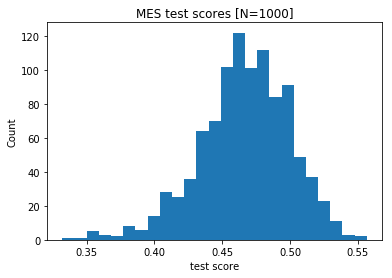

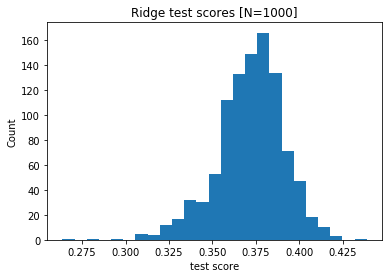

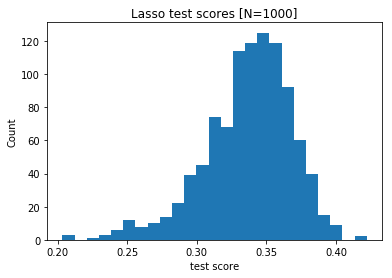

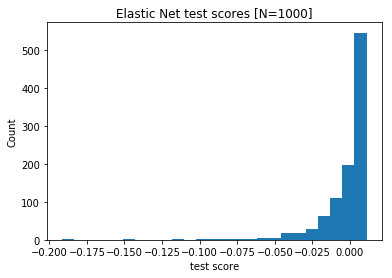

In [575]:
for title in ['MES','Ridge','Lasso','Elastic Net']:
    plt.figure(title)
    plt.title(title+' test scores [N='+str(N)+']')
    plt.hist(tscore[title],bins=25)
    plt.xlabel('test score'); plt.ylabel('Count')
    #plt.savefig('Diabete Dataset Figure\\'+title+' test scores.png')
    #plt.show()

Regularization 자체가 정확도를 포기하는 대신에 예측 성능을 늘렸다는 점을 고려하여서, 위와 Boston House price에서와 동일하게 진행해 보았다. 그럴경우 Regularization을 한 것이 더 좋을 것 같다는 예상과 달리 예측 성능은 MES > Ridge > Lasso > Elastic Net 순으로 나왔다. 따라서 총 4가지 Linear Regression 중에서 diabetes dataset을 가장 잘 예측을 하는 모델은 MES라고 판단된다. 하지만 boston house price와 비교했을 때 그 정확도 수치가 낮다. 또한 이로부터 주어진 데이터가 상당히 unbiased 되어있다는 것도 알 수 있다.

이전 코멘트는 다중선형회귀에 대한 이해가 없던 상태에서 했던 것인지라 삭제함.

figure들을 폴더를 만들어 따로 제출하고 싶다면 폴더명에도 hw3을 넣기 바람.

ex) hw3_1_Figures. (hw4 는 잘 제출하였음)

또한 figure들을 따로 제출할 때에도 어떤 코드를 통해 그것들을 얻었는지 설명이 되야함.

(본문처럼 반복문을 이용해도 좋고, 변수를 바꾼다면 본문에 어떤 변수를 어떻게 바꿨는지 명시한다던가.)

위와는 별개로 감점은 없음.